In [1]:
from pywaffle import Waffle
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
lith_dict = {"LITH":["shale", 'sandstone', 'sandstone/shale' ,'chalk', 'limestone', 'marl', 'tuff'], 
             "well1":[61,15,10,5,5,3,1],
             "well2":[35,21,16,12,7,5,4]}

lith_data_df = pd.DataFrame.from_dict(lith_dict)

In [3]:
colors = ["#8dd3c7", '#deb887',"#bebada","#fb8072", "#80b1d3", "#fdb462","#008080"]

In [4]:
plot_labels = [f'{i} ({str(j)})' for i,j in zip(lith_data_df.LITH, lith_data_df.well1)]

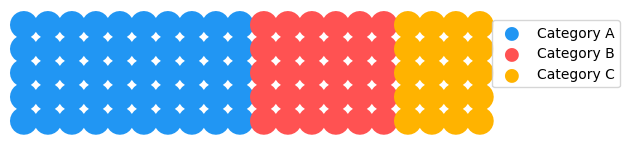

In [5]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

# Data to be visualized
data = {'Category A': 50, 'Category B': 30, 'Category C': 20}

# Creating the waffle chart
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5,  # Number of rows
    values=data, 
    colors=["#2196f3", "#ff5252", "#ffb300"],  # Custom colors
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='circle',  # Optional: use icons
    icon_size=20,  # Optional: icon size
    icon_legend=True  # Optional: show icons in legend
)

plt.show()


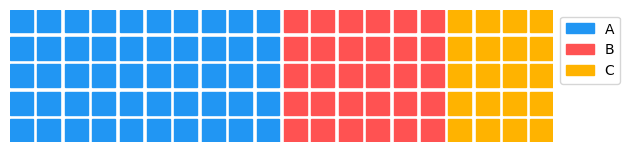

In [6]:
import pandas as pd
from pywaffle import Waffle

# Example dataframe
df = pd.DataFrame({
    'Category': ['A', 'B', 'C'],
    'Values': [50, 30, 20]
})

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=df.set_index('Category')['Values'].to_dict(), 
    colors=["#2196f3", "#ff5252", "#ffb300"],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
)

plt.show()


## Plotly graph objects

In [7]:
import plotly.graph_objects as go

# Create a basic line plot
fig = go.Figure()

# Add a trace (a line)
fig.add_trace(go.Scatter(x=[1, 2, 3, 4], y=[10, 11, 12, 13], mode='lines', name='Line'))

# Update the layout
fig.update_layout(title='Basic Line Plot', xaxis_title='X Axis', yaxis_title='Y Axis')

fig.show()


In [8]:
fig = go.Figure(data=[
    go.Bar(name='Category 1', x=['A', 'B', 'C'], y=[4, 7, 3]),
    go.Bar(name='Category 2', x=['A', 'B', 'C'], y=[2, 5, 8])
])

fig.update_layout(barmode='group', title='Grouped Bar Chart')
fig.show()


In [9]:
df = pd.read_csv("../class_practice/customers.csv")
df.head()

,customer_id,id,txn_type,txn_total,Customers,Products,Province,Relationship,Category
0,1001,1,Debit,165.78,Johnny Awesome,3,ON,1,wealth
1,1001,2,Credit,42.10,Johnny Awesome,3,ON,1,wealth
2,1001,4,Credit,103.03,Johnny Awesome,3,ON,1,wealth
3,1001,5,Credit,56.60,Johnny Awesome,3,ON,1,wealth
4,1002,6,Debit,214.34,Bob Marley,4,ON,1,personal_banking


In [16]:
import plotly.graph_objects as go

# Create traces for each set of bars
trace1 = go.Bar(
    x=df['Customers'],
    y=df['txn_total']/100,
    name='Value 1',
    marker_color='blue'
)

trace2 = go.Bar(
    x=df['Customers'],
    y=df['Products'],
    name='Value 2',
    marker_color='orange'
)

# Create the figure and add traces
fig = go.Figure(data=[trace1, trace2])

# Update layout to group bars
fig.update_layout(
    barmode='group',  # Use 'stack' for stacked bar charts
    title='Grouped Bar Chart',
    xaxis_title='Category',
    yaxis_title='Values',
    legend_title='Legend'
)

fig.show()


In [12]:
fig = go.Figure(data=[
    go.Scatter3d(x=[1, 2, 3], y=[4, 5, 6], z=[7, 8, 9], mode='markers')
])

fig.update_layout(title='3D Scatter Plot')
fig.show()


## Plotly express

In [17]:
import plotly.express as px
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({
    'x': [1, 2, 3, 4],
    'y': [10, 11, 12, 13],
    'category': ['A', 'B', 'C', 'D']
})

# Create a basic scatter plot
fig = px.scatter(df, x='x', y='y', color='category', title='Scatter Plot')

fig.show()


In [18]:
fig = px.histogram(df, x='x', nbins=5, title='Histogram')
fig.show()


In [19]:
fig = px.line(df, x='x', y='y', title='Customized Line Plot')
fig.update_layout(xaxis_title='Custom X Axis', yaxis_title='Custom Y Axis')
fig.update_traces(line=dict(color='green', width=4))
fig.show()


In [20]:
def foo():
    try:
        return 1
    finally:
        return 2

foo()

2

## Plotly Dashboard

In [22]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Sample data
df = pd.DataFrame({
    "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
    "Amount": [4, 1, 2, 2, 4, 5],
    "City": ["SF", "SF", "SF", "NYC", "NYC", "NYC"]
})

# Create a Dash application
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("Fruit Sales Dashboard"),
    dcc.Dropdown(
        id='city-dropdown',
        options=[{'label': i, 'value': i} for i in df['City'].unique()],
        value='SF'
    ),
    dcc.Graph(id='sales-bar-chart')
])

# Define the callback to update the bar chart
@app.callback(
    Output('sales-bar-chart', 'figure'),
    [Input('city-dropdown', 'value')]
)
def update_bar_chart(selected_city):
    filtered_df = df[df['City'] == selected_city]
    fig = px.bar(filtered_df, x='Fruit', y='Amount', color='Fruit', title=f'Fruit Sales in {selected_city}')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


/var/folders/6x/_cgtd_2j2qj3m9pv_1lyx7040000gp/T/ipykernel_15232/2144873407.py:2: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

/var/folders/6x/_cgtd_2j2qj3m9pv_1lyx7040000gp/T/ipykernel_15232/2144873407.py:3: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`

